
ARIMA Modelling

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

In [56]:
df = pd.read_csv('/content/NVDA.csv')
# , index_col ='Date'

inp_date = pd.to_datetime(df['Date'])

In [57]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-09-20,132.149994,134.830002,130.570007,131.759995,131.679443,52481800
1,2022-09-21,132.130005,140.309998,131.100006,132.610001,132.528931,80767900
2,2022-09-22,130.699997,131.490005,124.279999,125.610001,125.533211,75916200
3,2022-09-23,124.199997,126.110001,122.570000,125.160004,125.083488,66330900
4,2022-09-26,124.910004,126.589996,122.139999,122.279999,122.205246,54734300


<Axes: >

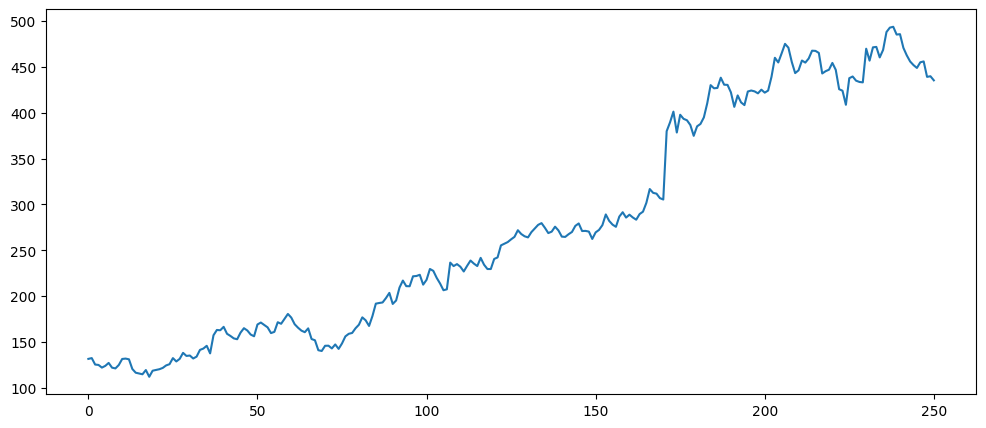

In [58]:
df['Close'].plot()

In [59]:
df['Date'] = pd.to_datetime(df['Date']) # If your Date column is of the type object otherwise skip this
# date_range = str(df['Date'].dt.date.min()) + ' to ' +str(df['Date'].dt.date.max())
# print(date_range)

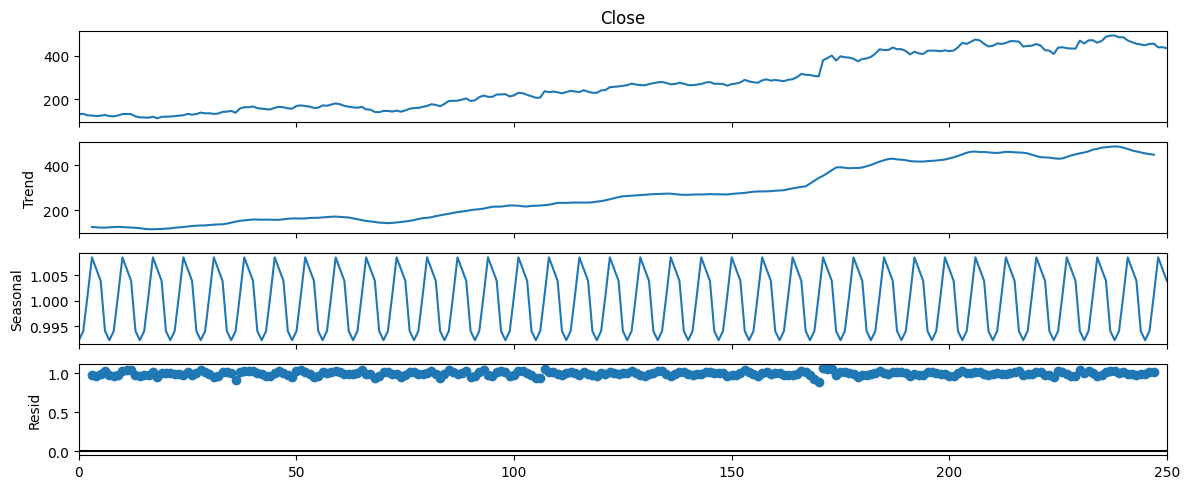

In [60]:
from pylab import rcParams
rcParams['figure.figsize'] = 12,5
result = seasonal_decompose(df['Close'],
                            model ='multiplicative',
                            period = 7)

# ETS plot
result.plot();


In [61]:
import warnings
warnings.filterwarnings('ignore')

In [62]:
!pip install pmdarima

In [63]:
from pmdarima import auto_arima
from statsmodels.tsa.arima_model import ARMA, ARIMA,ARMAResults,ARIMAResults

In [64]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

<Axes: >

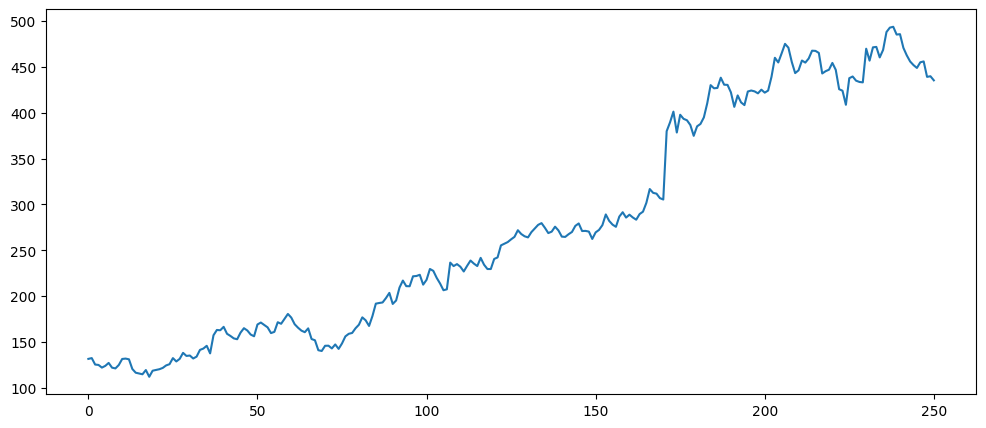

In [65]:
df['Close'].plot()

In [66]:
from scipy.integrate._ivp.radau import E
from statsmodels.tsa.stattools import adfuller

def adf_test(series,title=''):
  result = adfuller(series.dropna(), autolag='AIC')
  labels = ['ADF Test statistic', 'p-value', '# lags used', '# observations']
  out = pd.Series(result[0:4],index=labels)
  for key,val in result[4].items():
    out[f'critical value ({key})']=val

  print(out.to_string)

  if result[1] <= 0.05:
    print("Sufficient evidence to prove data has no unit root and is stationary")
  else:
    print('Sufficient evidence to prove data has unit root and is not stationary')

In [67]:
adf_test(df['Close']);

<bound method Series.to_string of ADF Test statistic       -0.471371
p-value                   0.897483
# lags used               0.000000
# observations          250.000000
critical value (1%)      -3.456781
critical value (5%)      -2.873172
critical value (10%)     -2.572969
dtype: float64>
Sufficient evidence to prove data has unit root and is not stationary


In [68]:
from statsmodels.tsa.statespace.tools import diff

In [69]:
# df['Close'] = diff(df['Date'],k_diff=1)

In [70]:
result = auto_arima(df['Close'],seasonal=True,m=7,trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[7] intercept   : AIC=1836.090, Time=1.70 sec
 ARIMA(0,1,0)(0,0,0)[7] intercept   : AIC=1829.061, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[7] intercept   : AIC=1832.769, Time=0.21 sec
 ARIMA(0,1,1)(0,0,1)[7] intercept   : AIC=1832.764, Time=0.22 sec
 ARIMA(0,1,0)(0,0,0)[7]             : AIC=1831.274, Time=0.02 sec
 ARIMA(0,1,0)(1,0,0)[7] intercept   : AIC=1830.769, Time=0.16 sec
 ARIMA(0,1,0)(0,0,1)[7] intercept   : AIC=1830.764, Time=0.11 sec
 ARIMA(0,1,0)(1,0,1)[7] intercept   : AIC=inf, Time=0.41 sec
 ARIMA(1,1,0)(0,0,0)[7] intercept   : AIC=1831.058, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[7] intercept   : AIC=1831.058, Time=0.11 sec
 ARIMA(1,1,1)(0,0,0)[7] intercept   : AIC=inf, Time=0.78 sec

Best model:  ARIMA(0,1,0)(0,0,0)[7] intercept
Total fit time: 3.825 seconds


In [71]:
len(df)

251

In [72]:
train = df.iloc[:200]
test = df.iloc[200:]

In [73]:
# from statsmodels.tsa.statespace.sarimax import SARIMAX
# import statsmodels.api as sm


In [74]:
# model = SARIMAX(train['Close'], order=(0,1,0))
# # model = sm.tsa.arima.ARIMA(train['Close'], order=(4,4,4))
# result = model.fit()
# type(result)

In [75]:
# result.summary()

In [76]:
def to_int(datetime):
  return datetime.year*10000000000 + datetime.month * 100000000 + datetime.day * 1000000

def to_string(datetime):
  return f'{datetime.year}-{datetime.month}-{datetime.day}'

def to_datetime(date):
   op = datetime.datetime(year = date.year, month = date.month, day = date.day)
   return op




In [77]:
start = len(train)
end = len(train) + len(test) - 1
date_start = df.index[start]
date_end = df.index[end]


In [78]:
predictions = result.predict(start= date_start, end=date_end).rename('ARIMA Predictions')


In [79]:
predictions

251    436.413772
252    437.627532
253    438.841292
254    440.055052
255    441.268812
256    442.482572
257    443.696332
258    444.910093
259    446.123853
260    447.337613
Name: ARIMA Predictions, dtype: float64

<Axes: >

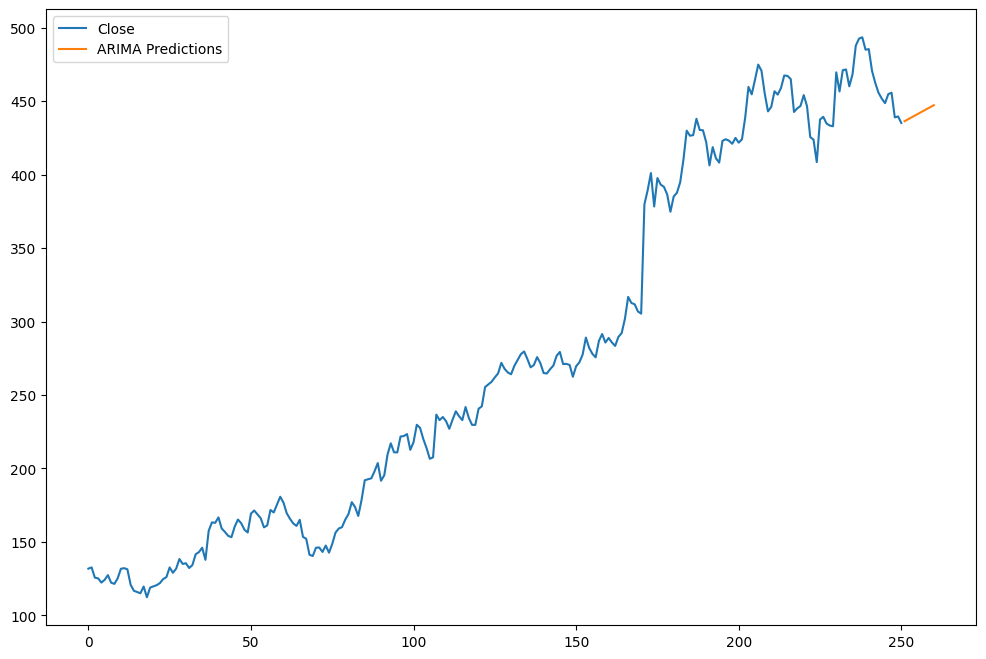

In [80]:
 #  2022-09-20 to 2023-09-19

fig, ax = plt.subplots()
# ax.set_xlim([datetime.date(2022, 8, 15), datetime.date(2023, 9, 19)])
# ax.set_ylim([0, 700])
df['Close'].plot(figsize=(12,8),legend=True)
predictions.plot(figsize=(12,8),legend=True)




In [81]:
!pip install statsmodels

In [82]:
# The auto-ARIMA process seeks to identify the most optimal parameters for an ARIMA model, settling on a single fitted ARIMA model.
# Auto-ARIMA works by conducting differencing tests (i.e., Kwiatkowski–Phillips–Schmidt–Shin, Augmented Dickey-Fuller or Phillips–Perron)
# to determine the order of differencing, d, and then fitting models within ranges of defined start_p, max_p, start_q, max_q ranges.
#  If the seasonal optional is enabled, auto-ARIMA also seeks to identify the optimal P and Q hyper- parameters
#   after conducting the Canova-Hansen to determine the optimal order of seasonal differencing, D.

# In order to find the best model, auto-ARIMA optimizes for a given information_criterion,
#  one of (‘aic’, ‘aicc’, ‘bic’, ‘hqic’, ‘oob’) (Akaike Information Criterion,
# Corrected Akaike Information Criterion, Bayesian Information Criterion,
# Hannan-Quinn Information Criterion, or “out of bag”–for validation scoring–respectively) and returns the ARIMA which minimizes the value.


result2 = auto_arima(df['Close'],seasonal=True,m=7,trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[7] intercept   : AIC=1836.090, Time=3.27 sec
 ARIMA(0,1,0)(0,0,0)[7] intercept   : AIC=1829.061, Time=0.04 sec
 ARIMA(1,1,0)(1,0,0)[7] intercept   : AIC=1832.769, Time=0.49 sec
 ARIMA(0,1,1)(0,0,1)[7] intercept   : AIC=1832.764, Time=0.46 sec
 ARIMA(0,1,0)(0,0,0)[7]             : AIC=1831.274, Time=0.05 sec
 ARIMA(0,1,0)(1,0,0)[7] intercept   : AIC=1830.769, Time=0.44 sec
 ARIMA(0,1,0)(0,0,1)[7] intercept   : AIC=1830.764, Time=0.31 sec
 ARIMA(0,1,0)(1,0,1)[7] intercept   : AIC=inf, Time=0.94 sec
 ARIMA(1,1,0)(0,0,0)[7] intercept   : AIC=1831.058, Time=0.10 sec
 ARIMA(0,1,1)(0,0,0)[7] intercept   : AIC=1831.058, Time=0.26 sec
 ARIMA(1,1,1)(0,0,0)[7] intercept   : AIC=inf, Time=1.29 sec

Best model:  ARIMA(0,1,0)(0,0,0)[7] intercept
Total fit time: 7.694 seconds


In [83]:
predictions2 = result2.predict(50, 0, typ = 'levels').rename('ARIMA Predictions')

In [84]:
from datetime import datetime

In [85]:
start_date = datetime(2023, 9, 25)
end_date = datetime(2023, 11, 7)
dates = pd.date_range(start=start_date, end=end_date, freq='1D')

In [86]:
type(inp_date[0])

pandas._libs.tslibs.timestamps.Timestamp

In [87]:
train = df
train['Date'] = inp_date
train =train.set_index('Date')
train =train.drop(columns=['Open', 'High','Low','Adj Close', 'Volume'])
train

,Close
Date,
2022-09-20,131.759995
2022-09-21,132.610001
2022-09-22,125.610001
2022-09-23,125.160004
2022-09-26,122.279999
...,...
2023-09-13,454.850006
2023-09-14,455.809998
2023-09-15,439.000000


In [88]:
real_x_test = pd.DataFrame(dates,columns=['Date'])
real_x_test

,Date
0,2023-09-25
1,2023-09-26
2,2023-09-27
3,2023-09-28
4,2023-09-29
5,2023-09-30
6,2023-10-01
7,2023-10-02
8,2023-10-03
9,2023-10-04


In [89]:
left = [i for i in range(301)]
# right = [i for i in range(50)]
# index_new = pd.DataFrame([left,right])
# index_new = index_new.transpose()
# index_new = pd.DataFrame(index_new,columns = ['old_index', 'new_index'])
# index_new
index_new = pd.DataFrame(left)

In [90]:
# index_new.set_index(0)

In [91]:
predictions2

251    436.413772
252    437.627532
253    438.841292
254    440.055052
255    441.268812
256    442.482572
257    443.696332
258    444.910093
259    446.123853
260    447.337613
261    448.551373
262    449.765133
263    450.978893
264    452.192653
265    453.406413
266    454.620173
267    455.833933
268    457.047693
269    458.261453
270    459.475213
271    460.688973
272    461.902733
273    463.116494
274    464.330254
275    465.544014
276    466.757774
277    467.971534
278    469.185294
279    470.399054
280    471.612814
281    472.826574
282    474.040334
283    475.254094
284    476.467854
285    477.681614
286    478.895374
287    480.109135
288    481.322895
289    482.536655
290    483.750415
291    484.964175
292    486.177935
293    487.391695
294    488.605455
295    489.819215
296    491.032975
297    492.246735
298    493.460495
299    494.674255
300    495.888015
Name: ARIMA Predictions, dtype: float64

In [92]:
arr2 = []
for i in predictions2:
  arr2.append(i)

arr2

[436.413772068,
 437.627532136,
 438.841292204,
 440.055052272,
 441.26881234,
 442.482572408,
 443.696332476,
 444.910092544,
 446.123852612,
 447.33761268,
 448.551372748,
 449.765132816,
 450.978892884,
 452.192652952,
 453.40641302,
 454.620173088,
 455.833933156,
 457.047693224,
 458.261453292,
 459.47521336,
 460.688973428,
 461.902733496,
 463.116493564,
 464.330253632,
 465.5440137,
 466.757773768,
 467.971533836,
 469.185293904,
 470.399053972,
 471.61281404,
 472.826574108,
 474.040334176,
 475.254094244,
 476.467854312,
 477.68161438,
 478.895374448,
 480.109134516,
 481.322894584,
 482.536654652,
 483.75041472,
 484.964174788,
 486.177934856,
 487.391694924,
 488.605454992,
 489.81921506,
 491.032975128,
 492.246735196,
 493.460495264,
 494.674255332,
 495.8880154]

In [93]:
pred_2 = pd.DataFrame(arr2)
pred_2

,0
0,436.413772
1,437.627532
2,438.841292
3,440.055052
4,441.268812
5,442.482572
6,443.696332
7,444.910093
8,446.123853
9,447.337613


In [94]:
real_x_test

,Date
0,2023-09-25
1,2023-09-26
2,2023-09-27
3,2023-09-28
4,2023-09-29
5,2023-09-30
6,2023-10-01
7,2023-10-02
8,2023-10-03
9,2023-10-04


In [95]:
test = pd.concat([real_x_test, pred_2], axis=1)
test = test.dropna(how='any',axis=0)
test = test.set_index('Date')
test

,0
Date,
2023-09-25,436.413772
2023-09-26,437.627532
2023-09-27,438.841292
2023-09-28,440.055052
2023-09-29,441.268812
2023-09-30,442.482572
2023-10-01,443.696332
2023-10-02,444.910093
2023-10-03,446.123853


In [96]:
type(train['Close'][0])

numpy.float64

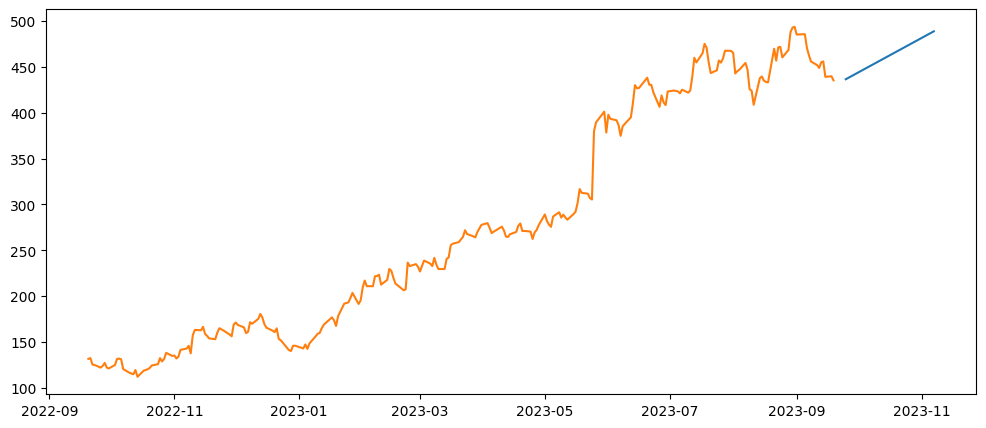

In [97]:
plt.plot(test)
plt.plot(train)
# plt.legend(['predicted','train'])

<Axes: >

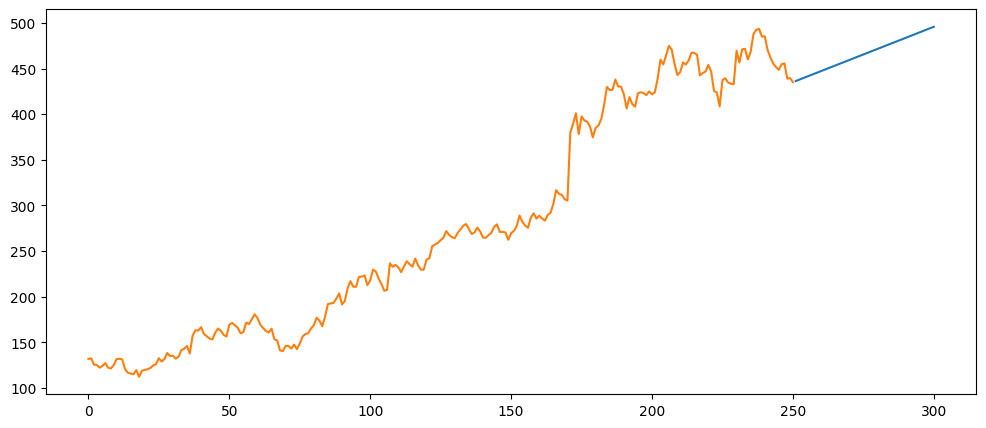

In [98]:
predictions2.plot()
df['Close'].plot()


In [99]:
test.loc['2023-10-25':'2023-11-07']

,0
Date,
2023-10-25,472.826574
2023-10-26,474.040334
2023-10-27,475.254094
2023-10-28,476.467854
2023-10-29,477.681614
2023-10-30,478.895374
2023-10-31,480.109135
2023-11-01,481.322895
2023-11-02,482.536655
